# Sheet 8: Solution

In [1]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=4,repr.plot.height=4) # this is just to render graphics as png and not as svg, and to adjust the default size

# Exercise 1: Dimension reduction with LDA

Let us become familiar with the concept of dimension reduction. Here, for the example of LDA.

In [4]:
X2 <- read.table("train.2",sep=",")
X3 <- read.table("train.3",sep=",")
X <- rbind(X2,X3)
X <- as.matrix(X,ncol=256) 
Y2 <- rep("2",times=nrow(X2))
Y3 <- rep("3",times=nrow(X3))
Y <- c(Y2,Y3)

train=data.frame(X,Y)
dim(X)
dim(X[,-16])

[1] 1389  256

[1] 1389  255

In [11]:
library(MASS)
#library(ggplot2)
#library(scales)
#library(gridExtra)

lda <- lda(Y ~ X[,-16], train)
print(summary(lda))
# Now define directions in the 256-dimensional 
# (here 255 dimensions because we omitted the colinear component)
# space.
# We define a random direction, an arbitrary direction (the vector of ones)
# and the direction that is commonly referred to as LD1, which is
# the vector of parameters of the linear discriminant analysis.
# Clearly this vector is orthogonal to the decision boundary between 
# the two classes.
set.seed(15)
pRand <- X[,-16]%*%runif(255)
pArb <- X[,-16]%*%rep(1,255)
pLD1 <- X[,-16]%*%coef(lda)
print(dim(pRand))
print(dim(pArb))
print(dim(pLD1))
# Let us now plot the data in the two dimensional projection
# obtained by projecting on the arbirary direction and LD1.
# Clearly, this separates the data nicely. One can proof (see Hastie Chapter 4)
# that LD1 maximizes the between-class variance of the data.
#plot(pLD1,pArb,col=ifelse(Y=="3", "coral", "cornflowerblue"))
# By contrast, any random direction won't give you a separation of classes
# almost with certainty.
#plot(pRand,pArb,col=ifelse(Y=="3", "coral", "cornflowerblue"))

        Length Class  Mode     
prior     2    -none- numeric  
counts    2    -none- numeric  
means   510    -none- numeric  
scaling 255    -none- numeric  
lev       2    -none- character
svd       1    -none- numeric  
N         1    -none- numeric  
call      3    -none- call     
terms     3    terms  call     
xlevels   0    -none- list     
[1] 1389    1
[1] 1389    1
[1] 1389    1


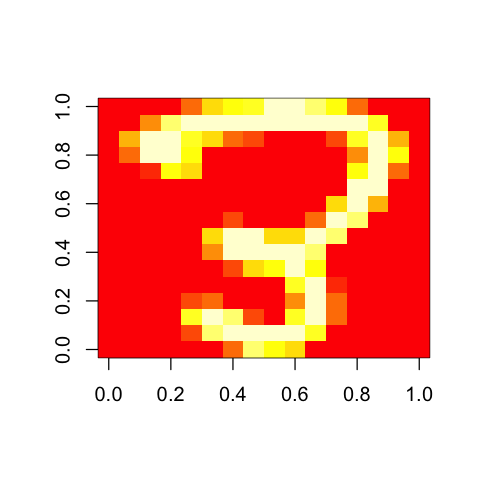

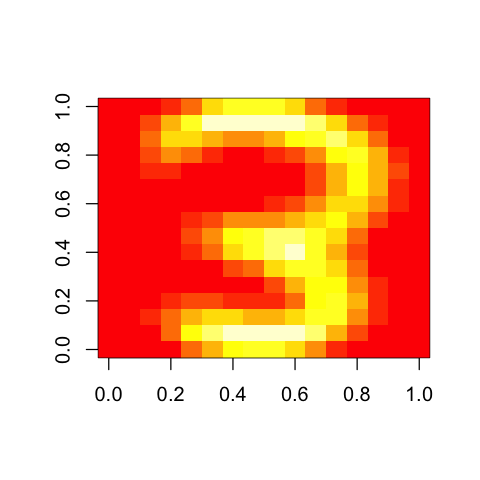

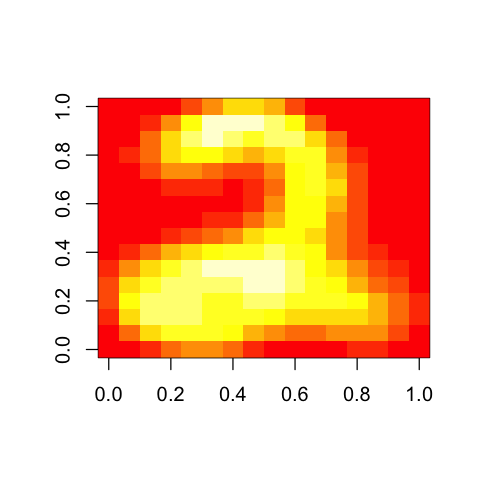

In [4]:
library(gridExtra)
# let's have a look on the data
# first on one sample for the "3"
image(matrix(as.matrix(X3[1,]),16,16))
# then on the mean for the "3"
X3 = as.matrix(X3,ncol=256)
meanX3 = colMeans(X3)
m3 = matrix(meanX3,16,16)
image(m3)
# then on the mean for the "2"
# here we have to flip the matrix
X2 = as.matrix(X2,ncol=256)
meanX2 = colMeans(X2)
m2 = matrix(rev(meanX2),16,16)
m2 = m2[nrow(m2):1,]
image(m2)

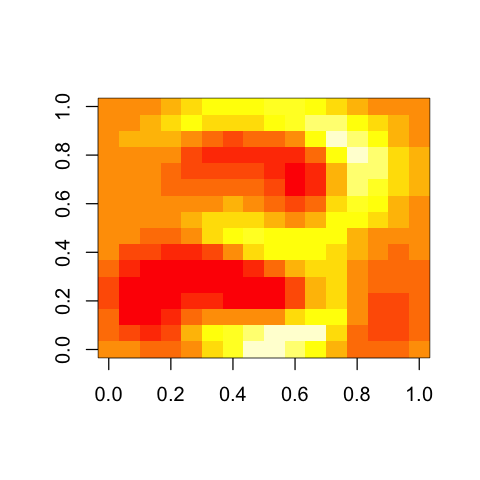

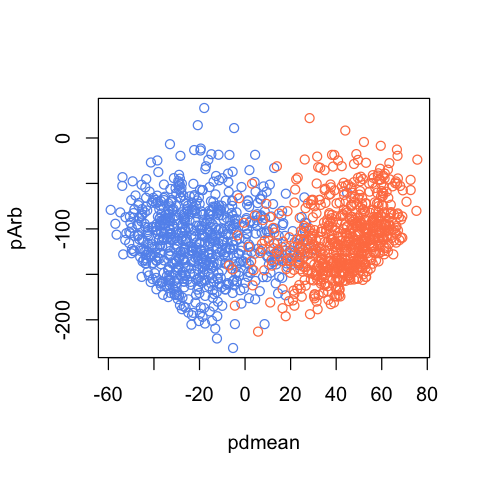

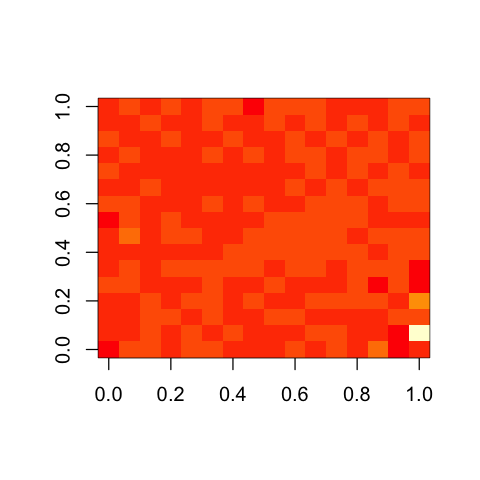

In [5]:
# an easy and intuitive way of defining a direction
# that separates classes is by computing the direction
# of the vector that joins the two class means
# clearly, this direction is something we can easily interpret in an image
image(m3-m2)
# But does this separate the data? Yes, it does! Though not as good as LD1
# (which can be rigorously shown to maximize the between-class variance, see Hastie Ch. 4)
dmean = (meanX3-meanX2)[-16]
pdmean <- X[,-16]%*%dmean
plot(pdmean,pArb,col=ifelse(Y=="3", "coral", "cornflowerblue"))
#
# Now let's look at the LD1 direction, and see whether we can interpret
# this in an image.
# Insert a dummy 0 in the 16th component.
# -> Obviously, this cannot be easily interpreted by the human eye.
LD1full = rep(0,256)
LD1full[1:15] = coef(lda)[1:15]
LD1full[17:256] = coef(lda)[16:255]
image(matrix(as.matrix(LD1full),16,16))

# Exercise 2

Why is there masking using linear regression with an indicator response matrix (basically one against all strategy), but not in logistic regression (also not in GDA (LDA,QDA))? In logistic regression, we fit a simple scalar class label, which can be unambiguously associated with a "landscape" (a scalar function) on feature space if the decision boundaries are linear. With linear regression, we fit a $K$-dimensional vector to feature space ($K$ being the number of classes). Even if the problem is linearly separable for the scalar case, this does not imply separability for the $K$-dimensional output space.

In [6]:
library(nnet)

In [7]:
set.seed(10)
n <- 50
# generate the features such that the
# problem is linearly separable
X <- rbind(matrix(c(rnorm(n),rnorm(n)),n,2),matrix(c(rnorm(n,3),rnorm(n,3)),n,2),matrix(c(rnorm(n,-3),rnorm(n,-3)),n,2))
# generate the response varibale (class labels)
y <- c(rep(1,n),rep(2,n),rep(3,n))
mnom <- multinom(y ~ X)
# summary(mnom)
Xoffset = cbind(rep(1,3*n),X)
# coef(mnom)
# the following line gives us the log odds for the classification
# problem normalized with respect to class 1
p <- Xoffset%*%t(coef(mnom))

# perform the same classification using linear regression of indicator matrix
Y <- t(cbind(matrix(c(1,0,0),3,n),matrix(c(0,1,0),3,n),matrix(c(c(0,0,1)),3,n)))
linm <- lm(Y ~ X)
plm <- Xoffset%*%coef(linm)

# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 10.527982
iter  20 value 5.862603
iter  30 value 5.361453
iter  40 value 5.359216
iter  50 value 5.358949
iter  60 value 5.357608
iter  70 value 5.357525
iter  80 value 5.356983
iter  90 value 5.356586
iter 100 value 5.355663
final  value 5.355663 
stopped after 100 iterations


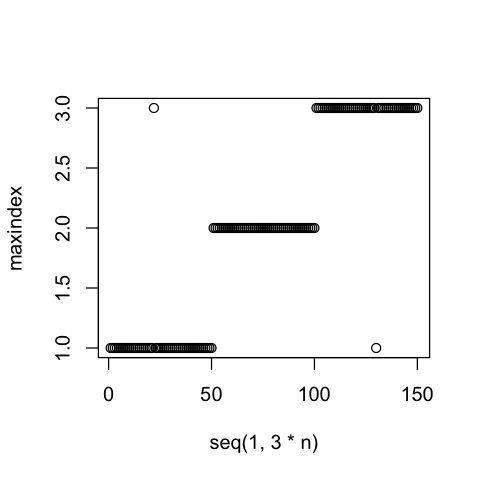

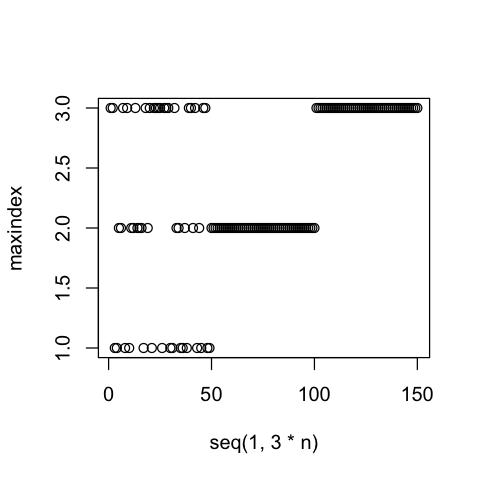

In [8]:
# now plot the results
# clearly, multinomial regression easily separates the training data
# with very little training error
pallclasses = cbind(rep(0,3*n),p)
maxindex = rep(0,3*n)
for (i in seq(1,3*n)) { maxindex[i] = which.max(pallclasses[i,]) }
plot(seq(1,3*n),maxindex)
# linear regression, by contrast, faces the problem that the first
# class is almost completely masked, and is almost never encountered
maxindex = rep(0,3*n)
for (i in seq(1,3*n)) { maxindex[i] = which.max(plm[i,]) }
plot(seq(1,3*n),maxindex)